In [1]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import numpy as np
from prunedcv import PrunerCV
import seaborn as sns

In [2]:
data = fetch_california_housing()
x = data['data']
y = data['target']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [4]:
model = LGBMRegressor()

In [5]:
def objective_standard(trial):

    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate
    }
    
    model.set_params(**params)

    return - np.mean(cross_val_score(model, x_train, y_train, cv=12, scoring='neg_mean_squared_error'))

study_standard = optuna.create_study()

study_standard.optimize(objective_standard, timeout=60)

[I 2019-03-08 08:52:06,906] Finished a trial resulted in value: 1.3268306867551145. Current best value is 1.3268306867551145 with parameters: {'n_estimators': 49, 'num_leaves': 11, 'colsample_bytree': 0.784634329459729, 'learning_rate': 0.00017474394344986626}.
[I 2019-03-08 08:52:08,476] Finished a trial resulted in value: 1.317934003997397. Current best value is 1.317934003997397 with parameters: {'n_estimators': 84, 'num_leaves': 36, 'colsample_bytree': 0.5131436394592194, 'learning_rate': 0.0001569064820322844}.
[I 2019-03-08 08:52:09,198] Finished a trial resulted in value: 1.234019000164622. Current best value is 1.234019000164622 with parameters: {'n_estimators': 14, 'num_leaves': 98, 'colsample_bytree': 0.781077137776091, 'learning_rate': 0.00441089059450311}.
[I 2019-03-08 08:52:11,263] Finished a trial resulted in value: 0.7125834487553714. Current best value is 0.7125834487553714 with parameters: {'n_estimators': 97, 'num_leaves': 53, 'colsample_bytree': 0.524012796041548, '

[I 2019-03-08 08:52:54,408] Finished a trial resulted in value: 0.22788442491719907. Current best value is 0.22097593336101728 with parameters: {'n_estimators': 72, 'num_leaves': 86, 'colsample_bytree': 0.9532511293555502, 'learning_rate': 0.08445589574869829}.
[I 2019-03-08 08:52:56,565] Finished a trial resulted in value: 0.6185637991864196. Current best value is 0.22097593336101728 with parameters: {'n_estimators': 72, 'num_leaves': 86, 'colsample_bytree': 0.9532511293555502, 'learning_rate': 0.08445589574869829}.
[I 2019-03-08 08:52:58,568] Finished a trial resulted in value: 0.2248344983734172. Current best value is 0.22097593336101728 with parameters: {'n_estimators': 72, 'num_leaves': 86, 'colsample_bytree': 0.9532511293555502, 'learning_rate': 0.08445589574869829}.
[I 2019-03-08 08:53:01,257] Finished a trial resulted in value: 0.24799601813560676. Current best value is 0.22097593336101728 with parameters: {'n_estimators': 72, 'num_leaves': 86, 'colsample_bytree': 0.95325112935

In [23]:
prun = PrunerCV(12, 0.1)

def objective_pruned(trial):

    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate
    }
    
    model.set_params(**params)

    return prun.cross_validate_score(model, x_train, y_train)

study_pruned = optuna.create_study()

study_pruned.optimize(objective_pruned, timeout=60)

[I 2019-03-08 08:55:36,587] Finished a trial resulted in value: 1.3146705934580674. Current best value is 1.3146705934580674 with parameters: {'n_estimators': 99, 'num_leaves': 87, 'colsample_bytree': 0.8685401954564631, 'learning_rate': 0.00013284293429121429}.
[I 2019-03-08 08:55:38,132] Finished a trial resulted in value: 1.2590425347859149. Current best value is 1.2590425347859149 with parameters: {'n_estimators': 66, 'num_leaves': 67, 'colsample_bytree': 0.6169673948065573, 'learning_rate': 0.0007679630616961129}.
[I 2019-03-08 08:55:38,645] Finished a trial resulted in value: 1.3309778405034471. Current best value is 1.2590425347859149 with parameters: {'n_estimators': 66, 'num_leaves': 67, 'colsample_bytree': 0.6169673948065573, 'learning_rate': 0.0007679630616961129}.
[I 2019-03-08 08:55:41,262] Finished a trial resulted in value: 1.2651478367022555. Current best value is 1.2590425347859149 with parameters: {'n_estimators': 66, 'num_leaves': 67, 'colsample_bytree': 0.6169673948

trial pruned at 2 fold


[I 2019-03-08 08:55:43,565] Finished a trial resulted in value: 0.970594713646604. Current best value is 0.24746571335110637 with parameters: {'n_estimators': 89, 'num_leaves': 11, 'colsample_bytree': 0.6344859202602935, 'learning_rate': 0.3083654914152344}.


trial pruned at 2 fold


[I 2019-03-08 08:55:43,755] Finished a trial resulted in value: 0.7458685902093118. Current best value is 0.24746571335110637 with parameters: {'n_estimators': 89, 'num_leaves': 11, 'colsample_bytree': 0.6344859202602935, 'learning_rate': 0.3083654914152344}.


trial pruned at 2 fold


[I 2019-03-08 08:55:44,342] Finished a trial resulted in value: 0.4093450119198589. Current best value is 0.24746571335110637 with parameters: {'n_estimators': 89, 'num_leaves': 11, 'colsample_bytree': 0.6344859202602935, 'learning_rate': 0.3083654914152344}.


trial pruned at 2 fold


[I 2019-03-08 08:55:44,466] Finished a trial resulted in value: 0.4769039930984366. Current best value is 0.24746571335110637 with parameters: {'n_estimators': 89, 'num_leaves': 11, 'colsample_bytree': 0.6344859202602935, 'learning_rate': 0.3083654914152344}.
[I 2019-03-08 08:55:45,150] Finished a trial resulted in value: 0.23891748459625636. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.


trial pruned at 2 fold


[I 2019-03-08 08:55:45,326] Finished a trial resulted in value: 1.0705119807025851. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.


trial pruned at 2 fold


[I 2019-03-08 08:55:45,451] Finished a trial resulted in value: 0.2937480207672052. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.


trial pruned at 2 fold


[I 2019-03-08 08:55:45,704] Finished a trial resulted in value: 1.1365887217987714. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.


trial pruned at 6 fold


[I 2019-03-08 08:55:45,966] Finished a trial resulted in value: 0.26354268400175546. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.


trial pruned at 2 fold


[I 2019-03-08 08:55:46,100] Finished a trial resulted in value: 1.0621748153187178. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.
[I 2019-03-08 08:55:46,731] Finished a trial resulted in value: 0.24790317670355502. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.
[I 2019-03-08 08:55:47,769] Finished a trial resulted in value: 0.2399512504590332. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.8478619522023639, 'learning_rate': 0.1679631203577086}.
[I 2019-03-08 08:55:48,920] Finished a trial resulted in value: 0.24837238363608335. Current best value is 0.23891748459625636 with parameters: {'n_estimators': 33, 'num_leaves': 36, 'colsample_bytree': 0.84786195220236

trial pruned at 2 fold


[I 2019-03-08 08:55:50,682] Finished a trial resulted in value: 0.27247745517037475. Current best value is 0.23198312945239197 with parameters: {'n_estimators': 55, 'num_leaves': 53, 'colsample_bytree': 0.9196659208883385, 'learning_rate': 0.0899646221623197}.


trial pruned at 2 fold


[I 2019-03-08 08:55:50,882] Finished a trial resulted in value: 0.42357410325794104. Current best value is 0.23198312945239197 with parameters: {'n_estimators': 55, 'num_leaves': 53, 'colsample_bytree': 0.9196659208883385, 'learning_rate': 0.0899646221623197}.


trial pruned at 2 fold


[I 2019-03-08 08:55:51,250] Finished a trial resulted in value: 0.5853673903293226. Current best value is 0.23198312945239197 with parameters: {'n_estimators': 55, 'num_leaves': 53, 'colsample_bytree': 0.9196659208883385, 'learning_rate': 0.0899646221623197}.
[I 2019-03-08 08:55:52,781] Finished a trial resulted in value: 0.2200659804822943. Current best value is 0.2200659804822943 with parameters: {'n_estimators': 80, 'num_leaves': 50, 'colsample_bytree': 0.8349277537263698, 'learning_rate': 0.15347229996743383}.
[I 2019-03-08 08:55:55,867] Finished a trial resulted in value: 0.23467801425662801. Current best value is 0.2200659804822943 with parameters: {'n_estimators': 80, 'num_leaves': 50, 'colsample_bytree': 0.8349277537263698, 'learning_rate': 0.15347229996743383}.


trial pruned at 2 fold


[I 2019-03-08 08:55:56,224] Finished a trial resulted in value: 0.27160659239930446. Current best value is 0.2200659804822943 with parameters: {'n_estimators': 80, 'num_leaves': 50, 'colsample_bytree': 0.8349277537263698, 'learning_rate': 0.15347229996743383}.


trial pruned at 2 fold


[I 2019-03-08 08:55:56,664] Finished a trial resulted in value: 0.6619555498244104. Current best value is 0.2200659804822943 with parameters: {'n_estimators': 80, 'num_leaves': 50, 'colsample_bytree': 0.8349277537263698, 'learning_rate': 0.15347229996743383}.
[I 2019-03-08 08:56:01,180] Finished a trial resulted in value: 0.21645284214740054. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:01,854] Finished a trial resulted in value: 0.8297288534356096. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:02,539] Finished a trial resulted in value: 0.26725560713777385. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:05,792] Finished a trial resulted in value: 0.22096993828682232. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:06,506] Finished a trial resulted in value: 0.3384374738028443. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:07,041] Finished a trial resulted in value: 1.1888460141030854. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 4 fold


[I 2019-03-08 08:56:07,943] Finished a trial resulted in value: 0.23966973401036978. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:08,295] Finished a trial resulted in value: 0.34969515291092307. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:08,739] Finished a trial resulted in value: 1.208086437036848. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:11,391] Finished a trial resulted in value: 0.22931315743201472. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:11,468] Finished a trial resulted in value: 1.0850120807996027. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:13,884] Finished a trial resulted in value: 0.2235490245222097. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:14,155] Finished a trial resulted in value: 0.24797548548854859. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:14,754] Finished a trial resulted in value: 1.028350044012407. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:15,118] Finished a trial resulted in value: 0.3427942644464823. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:15,305] Finished a trial resulted in value: 0.3345941488152126. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:17,745] Finished a trial resulted in value: 0.22068175086034778. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:18,329] Finished a trial resulted in value: 0.3937686339252476. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:19,931] Finished a trial resulted in value: 0.2268032998329764. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:20,186] Finished a trial resulted in value: 0.31796385195079224. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:20,798] Finished a trial resulted in value: 1.1261838453973914. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:20,929] Finished a trial resulted in value: 0.29505701641178705. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:21,472] Finished a trial resulted in value: 0.24893296416967775. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:21,635] Finished a trial resulted in value: 1.0994056170797737. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:21,882] Finished a trial resulted in value: 0.255616671722189. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:22,248] Finished a trial resulted in value: 0.4609934574199479. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:22,402] Finished a trial resulted in value: 0.28255506548798326. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:23,713] Finished a trial resulted in value: 0.22772879034406326. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:24,355] Finished a trial resulted in value: 0.4634176258058104. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:24,804] Finished a trial resulted in value: 0.2512944047209722. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:25,131] Finished a trial resulted in value: 0.4165410469136014. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:25,762] Finished a trial resulted in value: 0.9301351816472612. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:25,930] Finished a trial resulted in value: 0.27383364900044105. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:26,310] Finished a trial resulted in value: 0.8788449556600545. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:26,551] Finished a trial resulted in value: 0.24456768036394333. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:26,638] Finished a trial resulted in value: 0.8269765684601634. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 2 fold


[I 2019-03-08 08:56:27,064] Finished a trial resulted in value: 0.3815262379599193. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:29,789] Finished a trial resulted in value: 0.22303414089571147. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


trial pruned at 7 fold


[I 2019-03-08 08:56:30,811] Finished a trial resulted in value: 0.2383090552334717. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:32,638] Finished a trial resulted in value: 0.2261974583028624. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.
[I 2019-03-08 08:56:34,961] Finished a trial resulted in value: 0.2231668107325845. Current best value is 0.21645284214740054 with parameters: {'n_estimators': 80, 'num_leaves': 100, 'colsample_bytree': 0.8351295341297117, 'learning_rate': 0.13079608539030038}.


In [24]:
model1 = LGBMRegressor()
model1.set_params(**study_standard.best_params)
model1.fit(x_train, y_train)
mean_squared_error(model1.predict(x_test), y_test)

0.215464595332915

In [25]:
model2 = LGBMRegressor()
model2.set_params(**study_pruned.best_params)
model2.fit(x_train, y_train)
mean_squared_error(model2.predict(x_test), y_test)

0.21093926861446044

In [26]:
df_stan = study_standard.trials_dataframe()
df_prun = study_pruned.trials_dataframe()

In [31]:
df_stan['time'] = (df_stan.datetime_start - df_stan.datetime_start.min()).astype('int') / 1_000_000_000
df_prun['time'] = (df_prun.datetime_start - df_prun.datetime_start.min()).astype('int') / 1_000_000_000

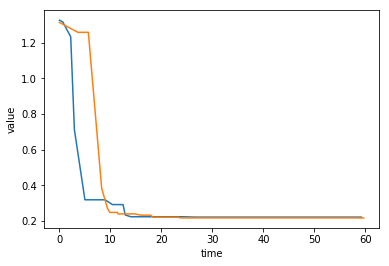

In [32]:
sns.lineplot(x=df_stan.time, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.time, y=df_prun.value.cummin());

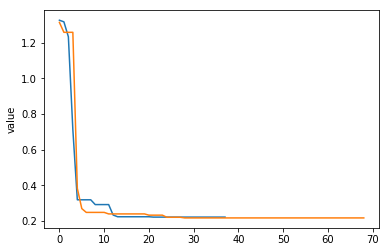

In [33]:
sns.lineplot(x=df_stan.index, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.index, y=df_prun.value.cummin());

In [34]:
df_prun.shape[0] / df_stan.shape[0]

1.8157894736842106